# Make All Figures for Main Manuscript

Kendra Wyant  
January 18, 2026

In [ ]:

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))
suppressPackageStartupMessages(library(patchwork))

theme_set(theme_classic())

path_models <- format_path("risk/models/messages")

model_full <- read_rds(here::here(path_models, "best_model_v17_kfold_full.rds"))

pp <- read_csv(here::here(path_models, "posteriors.csv"),
                    show_col_types = FALSE)

model_base <- read_rds(here::here(path_models, "best_model_v17_kfold_baseline.rds"))


In [ ]:
feat_imp <- model_full |> 
  tidy() |> 
  mutate(estimate = -1 * estimate) |> 
  filter(abs(estimate) > 0) |> 
  filter(term != "(Intercept)") |> 
  mutate(term = case_match(term,
                           "abstinence_confidence" ~ "Abstinence confidence (baseline)", 
                           "abstinence_goal_Yes" ~ "Goal of abstinence (baseline)",
                           "efficacy_neg_affect" ~ "Negative affect efficacy (baseline)",
                           "craving_total" ~ "Craving (baseline)",
                           "demo_income" ~ "Income (baseline)",
                           "demo_sex_Male" ~ "Male (baseline)",
                           "indiv_doa" ~ "Individual alcohol counseling (baseline)",
                           .default = term)) |> 
  mutate(term = if_else(str_detect(term, "cont_type_abr.friend"), "Friends (communications)", term),
         term = if_else(str_detect(term, ".NonDrinker"), "Non-drinkers (communications)", term),
         term = if_else(str_detect(term, ".support_status.Dont"), "Doesn't know about recovery (communications)", term),
         term = if_else(str_detect(term, ".Drinker"), "Drinkers (communications)", term),
         term = if_else(str_detect(term, ".phone_number"), "Number of unique contacts (communications)", term),
         term = if_else(str_detect(term, "experience.Unpleasant"), "Unpleasant interactions (communications)", term))|> 
  group_by(term) |> 
  summarise(estimate = mean(estimate)) |> 
  arrange(desc(abs(estimate))) |> 
  mutate(term = reorder(term, abs(estimate)))  |> 
  ggplot(aes(x = estimate, y = term, fill = estimate > 0)) +
  geom_col() +
  scale_fill_manual(values = c("TRUE" = "tomato", "FALSE" = "steelblue")) +
  labs(
    x = "Coefficient",
    y = NULL,
    title = "Feature Importance"
  ) +
  theme(legend.position = "none")



Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loaded glmnet 4.1-8

In [ ]:
# pp |> 
#   mutate(model = factor(model, levels = c("full model", "baseline model"),
#                         labels = c("Full model", "Baseline model"))) |> 
#   ggplot(aes(x = posterior)) +
#   geom_histogram(bins = 50, color = "black", fill = "light grey") +
#   facet_wrap(~model, ncol = 1)+
#   geom_vline(xintercept = .5, linetype = "dashed") +
#   geom_vline(xintercept = median(pp$posterior))

# post <- pp |> 
#   filter(model == "full model") |> 
#   ggplot(aes(x = posterior)) +
#   geom_histogram(bins = 30, color = "black", fill = "light grey") +
#   geom_vline(xintercept = .5, linetype = "dashed") +
#   geom_vline(xintercept = median(pp$posterior), linewidth = .6)


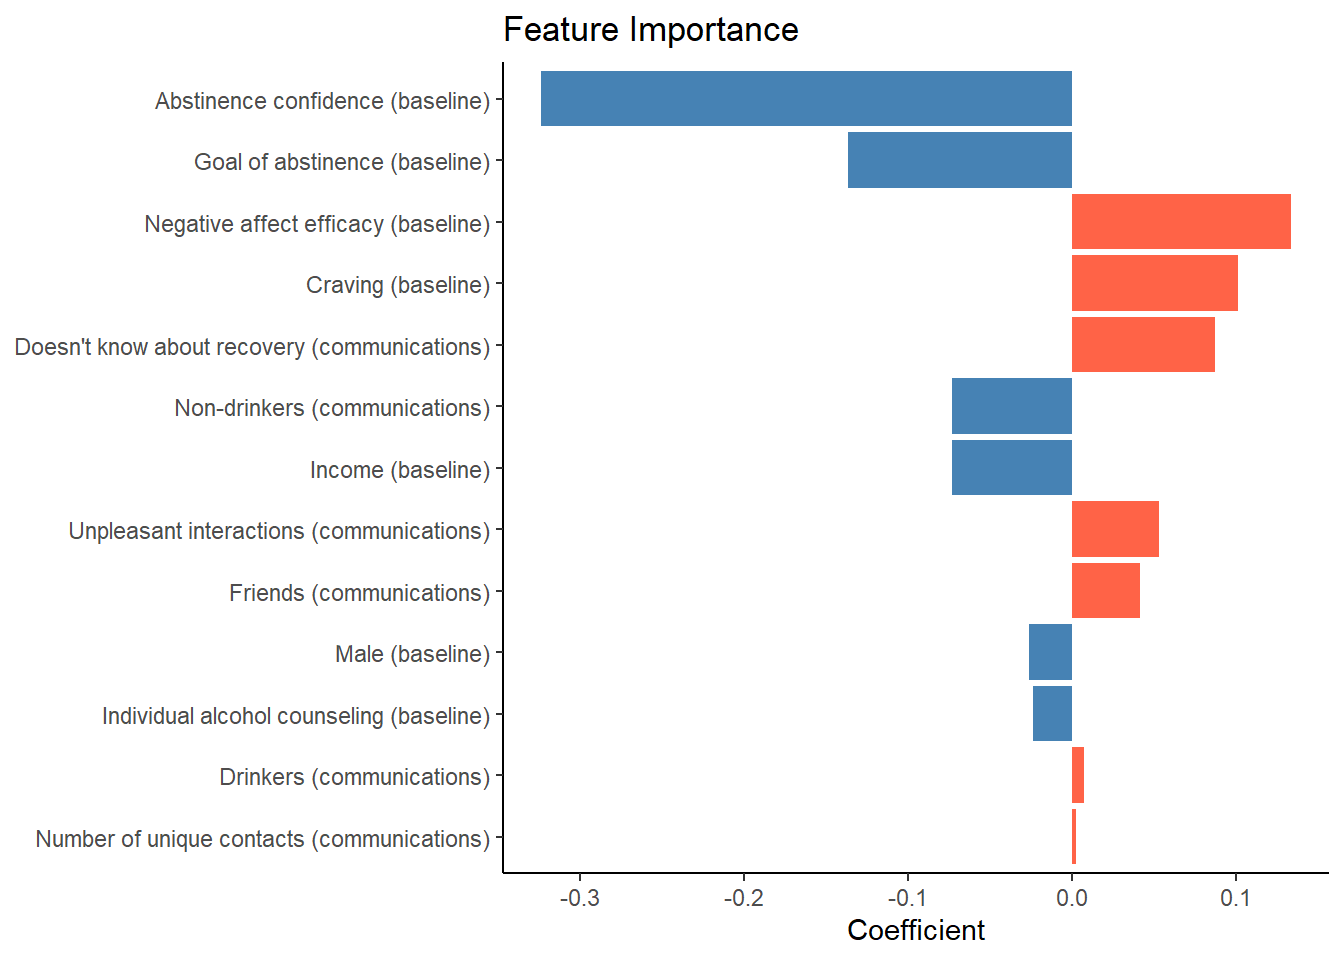

In [ ]:

feat_imp 
